# Simple Applications in Linear Problems

Kabui, Charles  
2025-04-28

**Linear Programming (LP)** is a mathematical technique used to
**optimize** (maximize or minimize) a linear objective function subject
to linear constraints, aiming to find the best outcome under given
conditions. Key components include the **Objective Function** (the goal
to optimize), **Constraints** (limitations or restrictions), and
**Decision Variables** (the choices to adjust). LP problems generally
involve minimizing or maximizing $Z = c_1 \times 1 + ... + c_n \times n$
subject to linear inequalities and non-negativity constraints.

Applications include **Production Scheduling**, where the objective is
to optimize the production mix to maximize profit or minimize cost based
on resource constraints, and **Transportation Problems**, which aim to
minimize total shipping cost from sources to destinations subject to
supply and demand constraints.

Solving methods range from the graphical method for problems with 2
variables to the simplex algorithm, special transportation methods (like
`Northwest Corner`, `Least Cost`, `MODI`), and the use of optimization
software or solvers.

## Graphical Method (2 variables)

A small workshop makes two types of furniture: chairs and tables. Each
chair requires 2 hours of carpentry and 1 hour of painting. Each table
requires 1 hour of carpentry and 1 hour of painting. The workshop has 6
hours of carpentry time and 4 hours of painting time available each day.
Each chair gives a profit of \$30, and each table gives a profit of
\$20.

**Task**:

-   Formulate the problem as a linear program.
-   Plot the feasible region and determine the optimal number of chairs
    and tables to maximize profit using a graphical method.

### Answer

#### Formulation of the Problem

Let:

-   $x$ = number of chairs produced
-   $y$ = number of tables produced

**Objective**: Maximize profit

$\text{Maximize } Z = 30x + 20y$

**Subject to constraints**:

-   Carpentry time:  
    $2x + y \leq 6$

-   Painting time:  
    $x + y \leq 4$

-   Non-negativity:  
    $x \geq 0, \quad y \geq 0$

#### Plot the Feasible Region

We plot the constraints: - $2x + y = 6$ =\> (x-intercept at `3`,
y-intercept at `6`) - $x + y = 4$ =\> (x-intercept at `4`, y-intercept
at `4`)

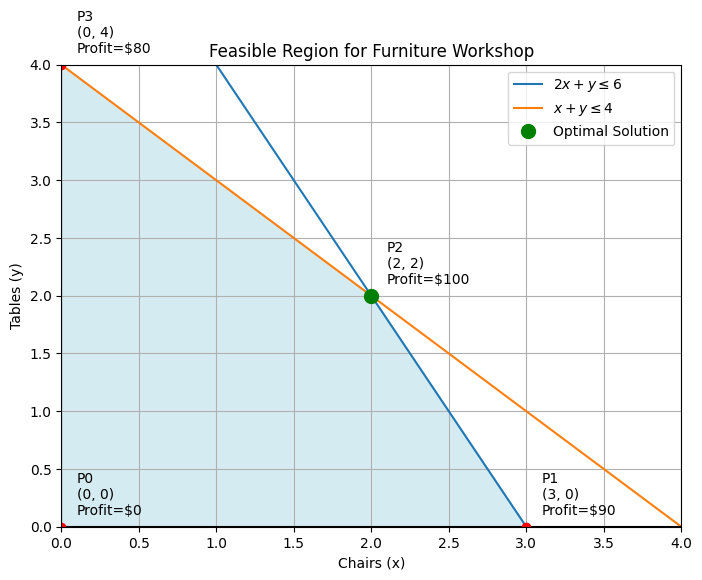

Optimal production plan: 2 chairs and 2 tables
Maximum profit: $100

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the constraints
x = np.linspace(0, 4, 100)

# Constraint lines
y1 = (6 - 2*x)  # from 2x + y <= 6
y2 = (4 - x)    # from x + y <= 4

# Plotting
plt.figure(figsize=(8,6))
plt.plot(x, y1, label=r'$2x + y \leq 6$')
plt.plot(x, y2, label=r'$x + y \leq 4$')

# Feasible region
plt.fill_between(
    x, 
    0, 
    np.minimum(y1, y2), 
    where=(np.minimum(y1, y2)>=0), 
    color='lightblue', 
    alpha=0.5)

# Label axes
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.xlabel('Chairs (x)')
plt.ylabel('Tables (y)')
plt.title('Feasible Region for Furniture Workshop')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.legend()

# Define corner points manually
points = np.array([
    [0, 0],
    [3, 0],    # from 2x + y = 6
    [2, 2],    # intersection point
    [0, 4],    # from x + y = 4
])

# Objective function: 30x + 20y
profits = [30*x + 20*y for x, y in points]

# Find max profit
max_profit_index = np.argmax(profits)
optimal_point = points[max_profit_index]
optimal_profit = profits[max_profit_index]

# Plot points
for i, (pt, profit) in enumerate(zip(points, profits)):
    plt.plot(pt[0], pt[1], 'ro')
    plt.text(
        pt[0]+0.1, 
        pt[1]+0.1, 
        f'P{i}\n({pt[0]}, {pt[1]})\nProfit=${profit}')

# Highlight optimal point
plt.plot(
    optimal_point[0], 
    optimal_point[1], 'go', 
    markersize=10, 
    label='Optimal Solution')
plt.legend()

plt.grid(True)
plt.show()

# Print solution
print(f"Optimal production plan: {int(optimal_point[0])} chairs and {int(optimal_point[1])} tables")
print(f"Maximum profit: ${optimal_profit}")


## Simplex Algorithm (via `scipy.optimize.linprog`)

A factory produces 3 products: A, B, and C. Each requires machine hours
on 2 machines: M1 and M2.

| Product | Profit | M1 Hours | M2 Hours |
|:-------:|:------:|:--------:|:--------:|
|    A    |  \$40  |    2     |    1     |
|    B    |  \$30  |    1     |    2     |
|    C    |  \$20  |    1     |    1     |

-   M1 is available for 100 hours/week.
-   M2 is available for 80 hours/week.

**Task**:

-   Formulate and solve using the Simplex algorithm via
    `scipy.optimize.linprog`.
-   Determine how many units of A, B, and C to produce to maximize
    profit.

### Answer

#### Formulate the Linear Program

Let: - $x_1$ = number of units of product A - $x_2$ = number of units of
product B - $x_3$ = number of units of product C

**Objective**: Maximize profit

$\text{Maximize } Z = 40x_1 + 30x_2 + 20x_3$

But `scipy.optimize.linprog` minimizes by default, so we minimize (-Z):

$\text{Minimize } Z = -40x_1 -30x_2 -20x_3$

**Subject to constraints**:

-   Machine 1 hours:  
    $2x_1 + 1x_2 + 1x_3 \leq 100$

-   Machine 2 hours:  
    $1x_1 + 2x_2 + 1x_3 \leq 80$

-   Non-negativity:  
    $x_1, x_2, x_3 \geq 0$

In [9]:
from scipy.optimize import linprog

# Coefficients for the objective function (negative because linprog minimizes)
c = [-40, -30, -20]

# Coefficients for the inequalities
A = [
    [2, 1, 1],  # M1 constraint
    [1, 2, 1],  # M2 constraint
]

# Right-hand side values
b = [100, 80]

# Bounds for variables (all must be >= 0)
x_bounds = (0, None)
bounds = [x_bounds, x_bounds, x_bounds]

# Solve the linear program
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

# Print results
if result.success:
    x1, x2, x3 = result.x
    max_profit = -result.fun
    print(f"Optimal production plan:")
    print(f"Product A: {x1:.2f} units")
    print(f"Product B: {x2:.2f} units")
    print(f"Product C: {x3:.2f} units")
    print(f"Maximum profit: ${max_profit:.2f}")
else:
    print("No solution found.")


Optimal production plan:
Product A: 40.00 units
Product B: 20.00 units
Product C: 0.00 units
Maximum profit: $2200.00

## Transportation Method - Northwest Corner Rule (manual or pandas/numpy)

A company has 3 factories (S1, S2, S3) and 4 distribution centers (D1,
D2, D3, D4).

**Supplies**:

-   S1: 30 units
-   S2: 40 units
-   S3: 20 units

**Demands**:

-   D1: 20 units
-   D2: 30 units
-   D3: 25 units
-   D4: 15 units

**Cost Matrix**:

|     | D1  | D2  | D3  | D4  |
|:---:|:---:|:---:|:---:|:---:|
| S1  |  8  |  6  | 10  |  9  |
| S2  |  9  |  7  |  4  |  2  |
| S3  |  3  |  4  |  2  |  5  |

**Task**: - Use the Northwest Corner Method to construct an initial
feasible solution manually or via a custom function in Python. - Display
the allocation matrix and compute the total transportation cost.

### Answer

#### Apply Northwest Corner Method (Manual)

We start from the top-left corner and allocate as much as possible.

-   Start at (`S1`, `D1`):
    -   Demand `D1 = 20`
    -   Supply `S1 = 30`
    -   Allocate **20** units (fulfills `D1`).
    -   Remaining supply `S1 = 10`, `D1` fulfilled.
-   Move to (`S1`, `D2`):
    -   Demand `D2 = 30`
    -   Supply `S1 = 10`
    -   Allocate **10** units (uses all of `S1`).
    -   Remaining demand `D2 = 20`, `S1` exhausted.
-   Move to (`S2`, `D2`):
    -   Demand `D2 = 20`
    -   Supply `S2 = 40`
    -   Allocate **20** units.
    -   Remaining supply`S2 = 20`, `D2` fulfilled.
-   Move to (`S2`, `D3`):
    -   Demand `D3 = 25`
    -   Supply `S2 = 20`
    -   Allocate **20** units (uses all of `S2`).
    -   Remaining demand `D3 = 5`, `S2` exhausted.
-   Move to (`S3`, `D3`):
    -   Demand `D3 = 5`
    -   Supply `S3 = 20`
    -   Allocate **5** units.
    -   Remaining supply `S3 = 15`, `D3` fulfilled.
-   Move to (`S3`, `D4`):
    -   Demand `D4 = 15`
    -   Supply `S3 = 15`
    -   Allocate **15** units (both `S3` and `D4` are fulfilled).

Allocation Matrix

|     | D1  | D2  | D3  | D4  |
|:---:|:---:|:---:|:---:|:---:|
| S1  | 20  | 10  |  0  |  0  |
| S2  |  0  | 20  | 20  |  0  |
| S3  |  0  |  0  |  5  | 15  |

Compute Total Transportation Cost

$(20 \times 8) + (10 \times 6) + (20 \times 7) + (20 \times 4) + (5 \times 2) + (15 \times 5) = 525$

#### Python

In [10]:
import numpy as np

# Cost matrix
cost = np.array([
    [8, 6, 10, 9],
    [9, 7, 4, 2],
    [3, 4, 2, 5]
])

supply = [30, 40, 20]
demand = [20, 30, 25, 15]

# Initialize allocation matrix
alloc = np.zeros((3,4), dtype=int)

i, j = 0, 0

while i < 3 and j < 4:
    alloc_qty = min(supply[i], demand[j])
    alloc[i, j] = alloc_qty
    supply[i] -= alloc_qty
    demand[j] -= alloc_qty
    
    if supply[i] == 0:
        i += 1
    else:
        j += 1

# Calculate total cost
total_cost = np.sum(alloc * cost)

print("Allocation Matrix:")
print(alloc)
print(f"Total Transportation Cost: ${total_cost}")


Allocation Matrix:
[[20 10  0  0]
 [ 0 20 20  0]
 [ 0  0  5 15]]
Total Transportation Cost: $525